In [6]:
import numpy as np
import pandas as pd
import seaborn as sns

from statistics import mean
from random import sample

from sklearn import preprocessing
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier

from pyuplift.variable_selection import *
from pyuplift.transformation import *
from pyuplift.model_selection import treatment_cross_val_score
from pyuplift.datasets import load_hillstrom_email_marketing

import warnings
warnings.filterwarnings('ignore')

In [7]:
df = load_hillstrom_email_marketing(load_raw_data=False)

In [8]:
df

{'DESCR': 'This dataset contains 64,000 customers who last purchased within twelve months. The customers were involved in an e-mail test. 1/3 were randomly chosen to receive an e-mail campaign featuring Mens merchandise. 1/3 were randomly chosen to receive an e-mail campaign featuring Womens merchandise. 1/3 were randomly chosen to not receive an e-mail campaign. During a period of two weeks following the e-mail campaign, results were tracked. Your job is to tell the world if the Mens or Womens e-mail campaign was successful.',
 'data': array([[ 10.  , 142.44,   1.  , ...,   0.  ,   1.  ,   0.  ],
        [  6.  , 329.08,   1.  , ...,   0.  ,   0.  ,   1.  ],
        [  7.  , 180.65,   0.  , ...,   0.  ,   0.  ,   1.  ],
        ...,
        [  6.  ,  29.99,   1.  , ...,   0.  ,   1.  ,   0.  ],
        [  1.  , 552.94,   1.  , ...,   1.  ,   0.  ,   0.  ],
        [  1.  , 472.82,   0.  , ...,   0.  ,   0.  ,   1.  ]]),
 'feature_names': ['recency',
  'history',
  'mens',
  'womens',


### Treatment
* 0, No E-Mail
* 1, Mens E-Mail
* 2, Womens E-Mail

In [9]:
ex_mens_indexes = df['treatment'] != 1
ex_womens_indexes = df['treatment'] != 2

In [16]:
X_ex_mens = df['data'][ex_mens_indexes]
X_ex_womens = df['data'][ex_womens_indexes]

y_ex_mens = df['target'][ex_mens_indexes]
y_ex_womens = df['target'][ex_womens_indexes]

t_ex_mens = df['treatment'][ex_mens_indexes]
t_ex_womens = df['treatment'][ex_womens_indexes]

#### Convert treatment column to 0-1

In [ ]:
d = {0: 0, 2: 1}
t_ex_mens = np.array(list(map(lambda x: d[x], t_ex_mens)))

In [18]:
cv = 5
seeds = [(i*10) for i in range(1, cv+1)] 

In [19]:
models = {
    'Econometric (Linear regression)': Econometric(LinearRegression(n_jobs=-1)),
    'Econometric (Random forest)': Econometric(RandomForestRegressor(n_jobs=-1)),

    'Two Model (Linear regression)': TwoModel(LinearRegression(n_jobs=-1), LinearRegression(n_jobs=-1)),
    'Two Model (Random forest)': TwoModel(RandomForestRegressor(n_jobs=-1), RandomForestRegressor(n_jobs=-1)),

    'Dummy (Linear regression)': Dummy(LinearRegression(n_jobs=-1)),
    'Dummy (Random forest)': Dummy(RandomForestRegressor(n_jobs=-1)),
    
    'Lai (Logistic Regression)': Lai(LogisticRegression(n_jobs=-1)),
    'Lai (Random forest)': Lai(RandomForestClassifier(n_jobs=-1)),
    
    'WeightedLai (Logistic regression)': WeightedLai(LogisticRegression(n_jobs=-1)),
    'WeightedLai (Random forest)': WeightedLai(RandomForestClassifier(n_jobs=-1)),

    'Kane (Logistic regression)': Kane(LogisticRegression(n_jobs=-1)),
    'Kane (Random forest)': Kane(RandomForestClassifier(n_jobs=-1)),
    
    'GeneralizedKane (Logistic regression)': GeneralizedKane(LogisticRegression(n_jobs=-1)),
    'GeneralizedKane (Random forest)': GeneralizedKane(RandomForestClassifier(n_jobs=-1)),

    'Reflective (Logistic regression)': Reflective(LogisticRegression(n_jobs=-1)),
    'Reflective (Random forest)': Reflective(RandomForestClassifier(n_jobs=-1)),
    
    'Pessimistic (Logistic regression)': Pessimistic(LogisticRegression(n_jobs=-1)),
    'Pessimistic (Random forest)': Pessimistic(RandomForestClassifier(n_jobs=-1)),
    
    'Jaskowski (Logistic regression)': Jaskowski(LogisticRegression(n_jobs=-1)),
    'Jaskowski (Random forest)': Jaskowski(RandomForestClassifier(n_jobs=-1)),
}

## No E-Mail vs Mens E-Mail

In [21]:
%%time
ex_womens_model_names, ex_womens_model_scores = [], []
for model_name in models:
    print(model_name)
    scores = treatment_cross_val_score(X_ex_womens, y_ex_womens, t_ex_womens, models[model_name], cv, seeds=seeds)
    for score in scores:
        ex_womens_model_names.append(model_name)
        ex_womens_model_scores.append(score)
df_ex_womens_stats = pd.DataFrame(data={'Model': ex_womens_model_names, 'Uplift': ex_womens_model_scores})

Econometric (Linear regression)
Econometric (Random forest)
Two Model (Linear regression)
Two Model (Random forest)
Dummy (Linear regression)
Dummy (Random forest)
Lai (Logistic Regression)
Lai (Random forest)
WeightedLai (Logistic regression)
WeightedLai (Random forest)
Kane (Logistic regression)
Kane (Random forest)
GeneralizedKane (Logistic regression)
GeneralizedKane (Random forest)
Reflective (Logistic regression)
Reflective (Random forest)
Pessimistic (Logistic regression)
Pessimistic (Random forest)
Jaskowski (Logistic regression)
Jaskowski (Random forest)
Wall time: 40min 20s


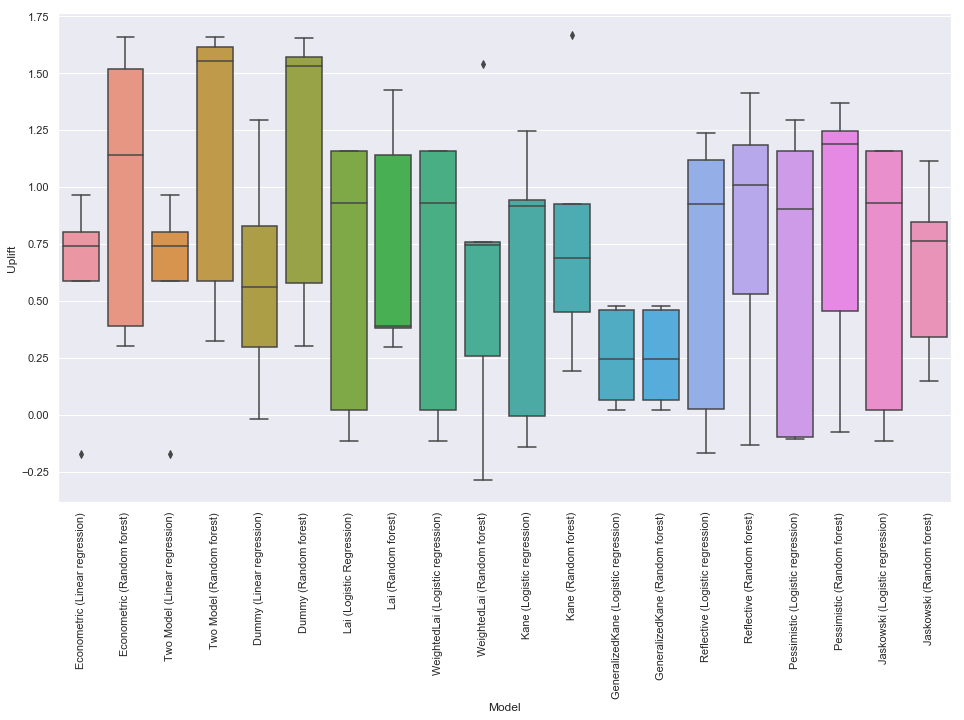

In [28]:
sns.set(style="whitegrid")
sns.set(rc={'figure.figsize':(16, 9)})
ax = sns.boxplot(x="Model", y="Uplift", data=df_ex_womens_stats)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90);

## No E-Mail vs Womens E-Mail

In [23]:
%%time
ex_mens_model_names, ex_mens_model_scores = [], []
for model_name in models:
    print(model_name)
    scores = treatment_cross_val_score(X_ex_mens, y_ex_mens, t_ex_mens, models[model_name], cv, seeds=seeds)
    for score in scores:
        ex_mens_model_names.append(model_name)
        ex_mens_model_scores.append(score)
df_ex_mens_stats = pd.DataFrame(data={'Model': ex_mens_model_names, 'Uplift': ex_mens_model_scores})

Econometric (Linear regression)
Econometric (Random forest)
Two Model (Linear regression)
Two Model (Random forest)
Dummy (Linear regression)
Dummy (Random forest)
Lai (Logistic Regression)
Lai (Random forest)
WeightedLai (Logistic regression)
WeightedLai (Random forest)
Kane (Logistic regression)
Kane (Random forest)
GeneralizedKane (Logistic regression)
GeneralizedKane (Random forest)
Reflective (Logistic regression)
Reflective (Random forest)
Pessimistic (Logistic regression)
Pessimistic (Random forest)
Jaskowski (Logistic regression)
Jaskowski (Random forest)
Wall time: 50min 37s


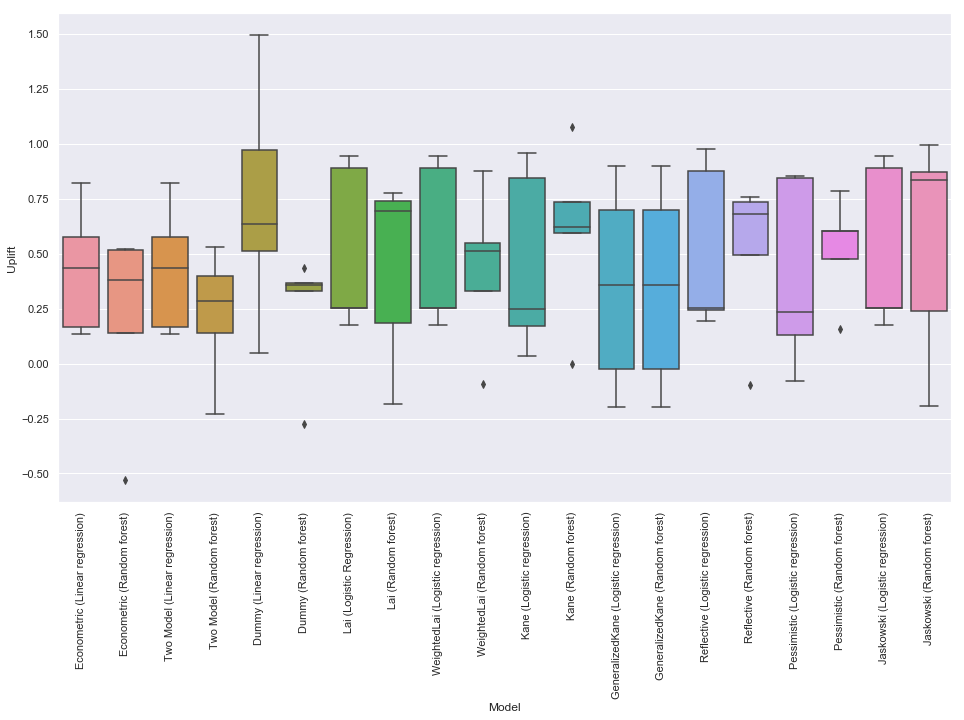

In [27]:
sns.set(style="whitegrid")
sns.set(rc={'figure.figsize':(16, 9)})
ax = sns.boxplot(x="Model", y="Uplift", data=df_ex_mens_stats)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90);